In [157]:
#the goal of this program is to show that particles of identical mass in 2D will go to a thermal distribution
#  if random pairs scatter in a way that conserves their center of mass velocity but random rotates their relative velocity
#N particles are defined with vel
#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt
#math has more complicated math operations like sin, cos, exp, ...
import math

#these are variables whose value I want to use in other cells
global nbin, vel0, velf, dvbin, natom, pi, velset

#define pi
pi = math.pi

#set the size scale for the velocities
velset = 1.8

#initialize arrays for the velocity distribution with empty values to be filled in the loops below
nbin = 200
binvx = np.empty(nbin)
binvy = np.empty(nbin)
#binth will hold the theoretical velocity distribution function sqrt(alpha/pi) exp(-alpha v^2) with alpha = 1/velset^2
binth = np.empty(nbin)
#vbin will hold the center values for the velocity bins
vbin = np.empty(nbin)

#set parameters to use for binning the velocity distribution
vel0 =-5.0*velset
velf = 5.0*velset
dvbin = (velf - vel0)/nbin

#initialize arrays of the x,y velocity components with empty values to be filled in the loops below
#natom will be the number of particles in the simulation
natom=10000
vx = np.empty(natom)
vy = np.empty(natom)

#set the sequence of random numbers
iseed = 1
np.random.seed(iseed)

#set the initial velocities to have magnitude velset: vx^2 + vy^2 = velset^2 but the direction of the velocity for atom n will be random
# the following loop puts the velocity direction to be random
n=0
while n<natom:
    phs = 2.0*pi*np.random.rand()
    vx[n] = velset*math.cos(phs)
    vy[n] = velset*math.sin(phs)
    n+=1

#uncomment to get the following loop puts the velocity direction to be randomly +hat{x} or -hat{x} direction
#n=0
#while n<natom:
#    vx[n] = velset
#    if np.random.rand() < 0.5:
#        vx[n] =-velset
#    vy[n] = 0.0
#    n+=1


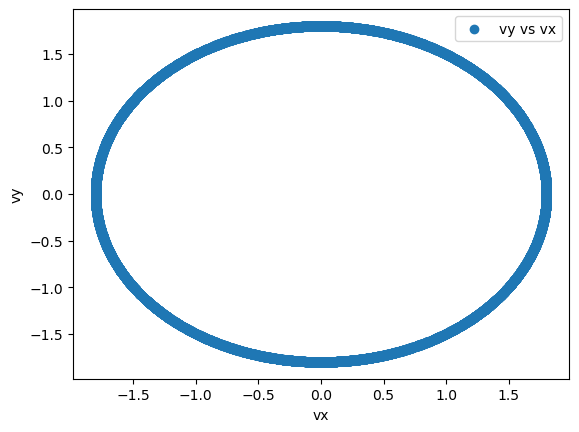

In [158]:
#plot the vx,vy in a scatter plot
plt.scatter(vx,vy,label='vy vs vx')
plt.legend()
plt.xlabel('vx')
plt.ylabel('vy')
plt.show()

In [159]:
#get the vx and vy distribution functions
nb=0
while nb<nbin:
    vbin[nb] = vel0 + (nb+0.5)*dvbin
#initialize the velocity bins
    binvx[nb] = 0.0
    binvy[nb] = 0.0
#put in the theoretical value for the velocity distribution for a thermal distribution of velocities
    binth[nb] = math.exp(-vbin[nb]*vbin[nb]/velset/velset)/velset/math.sqrt(pi)
    nb+=1

#the following loop bins the x and y velocities to turn the list of velocities into a distribution function
n=0
while n<natom:
    #find which bin the particle = n vx goes into and increment that bin
    dum = (vx[n]-vel0)/dvbin
    i=int(dum)
    if i >= 0 and i < nbin:
        binvx[i] += 1.0/(natom*dvbin)
    #find which bin the particle = n vx goes into and increment that bin
    dum = (vy[n]-vel0)/dvbin
    i=int(dum)
    if i >= 0 and i < nbin:
        binvy[i] += 1.0/(natom*dvbin)
    n+=1


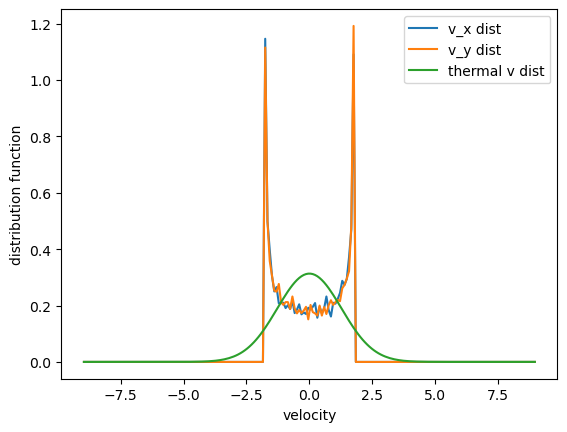

In [160]:
#plot the vx and vy velocity distribution and compare to a thermal velocity distribution
plt.plot(vbin,binvx,label='v_x dist')
plt.plot(vbin,binvy,label='v_y dist')
plt.plot(vbin,binth,label='thermal v dist')
plt.legend()
plt.xlabel('velocity')
plt.ylabel('distribution function')
plt.show()

In [161]:
#do the scattering which is assumed to conserve the center of mass velocity but randomizes the relative velocity
#a scattering is done by randomly picking a pair of particles and rotating their relative velocity by a random angle

#nscat is the average number of scatterings a given particle will have
#as nscat increases the vx and vy distributions should approach the thermal distribution
nscat = 4
n=0
#each scattering involves 2 particles so you need to loop over (natom/2)*nscat to have each particle have nscat scatterings on average
while n<(natom/2)*nscat:
    # pick the random pair of particles
    i = int((natom*np.random.rand()))
    j = int((natom*np.random.rand()))
    #compute and save the center of mass velocity
    vxp = 0.5*(vx[i]+vx[j])
    vyp = 0.5*(vy[i]+vy[j])
    #compute the relative velocity
    vxm = 0.5*(vx[i]-vx[j])
    vym = 0.5*(vy[i]-vy[j])
    #compute the random angle
    phs = 2.0*pi*np.random.rand()
    #rotate the relative velocity by that random angle
    vxa = vxm*math.cos(phs) + vym*math.sin(phs)
    vya =-vxm*math.sin(phs) + vym*math.cos(phs)
    #compute the new velocity of particle i
    vx[i] = vxp + vxa
    vy[i] = vyp + vya
    #compute the new velocity of particle j
    vx[j] = vxp - vxa
    vy[j] = vyp - vya
    n+=1


#get the vx and vy distribution functions
nb=0
while nb<nbin:
#initialize the velocity bins
    binvx[nb] = 0.0
    binvy[nb] = 0.0
    nb+=1

#the following loop bins the x and y velocities to turn the list of velocities into a distribution function
n=0
while n<natom:
    #find which bin the particle = n vx goes into and increment that bin
    dum = (vx[n]-vel0)/dvbin
    i=int(dum)
    if i >= 0 and i < nbin:
        binvx[i] += 1.0/(natom*dvbin)
    #find which bin the particle = n vx goes into and increment that bin
    dum = (vy[n]-vel0)/dvbin
    i=int(dum)
    if i >= 0 and i < nbin:
        binvy[i] += 1.0/(natom*dvbin)
    n+=1


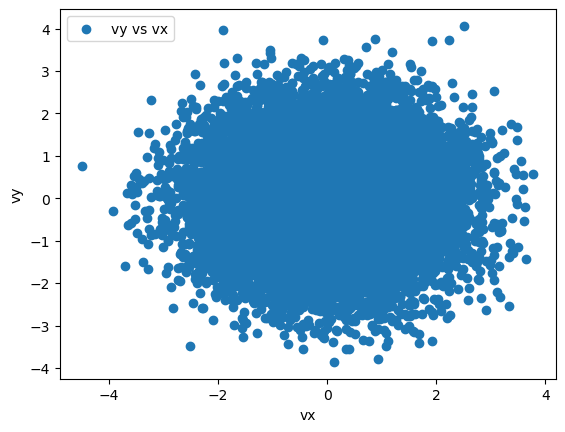

In [162]:
#plot the vx,vy in a scatter plot
plt.scatter(vx,vy,label='vy vs vx')
plt.legend()
plt.xlabel('vx')
plt.ylabel('vy')
plt.show()

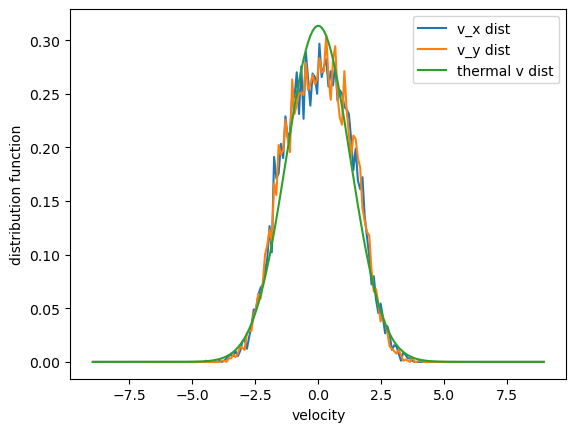

In [163]:
#plot the vx and vy velocity distribution and compare to a thermal velocity distribution
plt.plot(vbin,binvx,label='v_x dist')
plt.plot(vbin,binvy,label='v_y dist')
plt.plot(vbin,binth,label='thermal v dist')
plt.legend()
plt.xlabel('velocity')
plt.ylabel('distribution function')
plt.show()